In [93]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
experiments = ["Burgers", "KS"]
models = ["deterministic", "normal"]
index = ["RMSETest","EnergyScoreTest", "t_training_avg", "distributional_method", "seed"]
metrics = ["RMSETest", "EnergyScoreTest", "t_training_avg"]

In [116]:
full_results = pd.DataFrame(columns = ["RMSETest", "EnergyScoreTest", "t_training_avg", "method", "experiment"])
for experiment in experiments:
    det_path = f"../results/{experiment}/deterministic/"
    file_list = ([f for f in glob.iglob(det_path + "**", recursive = True) if os.path.isfile(f) and f.endswith(".csv")])
    results = pd.DataFrame()
    for file in file_list:
        if os.path.exists(file):
            results_df = pd.read_csv(file, index_col=0)
            results = pd.concat([results, results_df], axis = 1)

    for model in models:
        if model != "deterministic":
            path = f"../results/{experiment}/{model}/"
            file_list = ([f for f in glob.iglob(path + "**", recursive = True) if os.path.isfile(f) and f.endswith(".csv")])
            for file in file_list:
                if os.path.exists(file):
                    results_df = pd.read_csv(file, index_col=0)
                    results = pd.concat([results, results_df], axis = 1)

    results = results.loc[index].transpose()
    base_results = results[results["distributional_method"] == "deterministic"][metrics].astype("float")
    for model in models:
        if model != "deterministic":
            model_results = results[results["distributional_method"] == model][metrics].astype("float")
            model_improvement = (base_results-model_results)/base_results
            model_improvement["method"] = model
            model_improvement["experiment"] = experiment
            full_results = pd.concat([full_results, model_improvement], axis = 0)

full_results.rename({"RMSETest": "RMSE", "EnergyScoreTest": "EnergyScore", "t_training_avg":"t"}, axis = 1, inplace = True)
full_results["t"] = full_results["t"]*(-1)

/tmp/ipykernel_1424689/1576092330.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_results = pd.concat([full_results, model_improvement], axis = 0)


# Plot

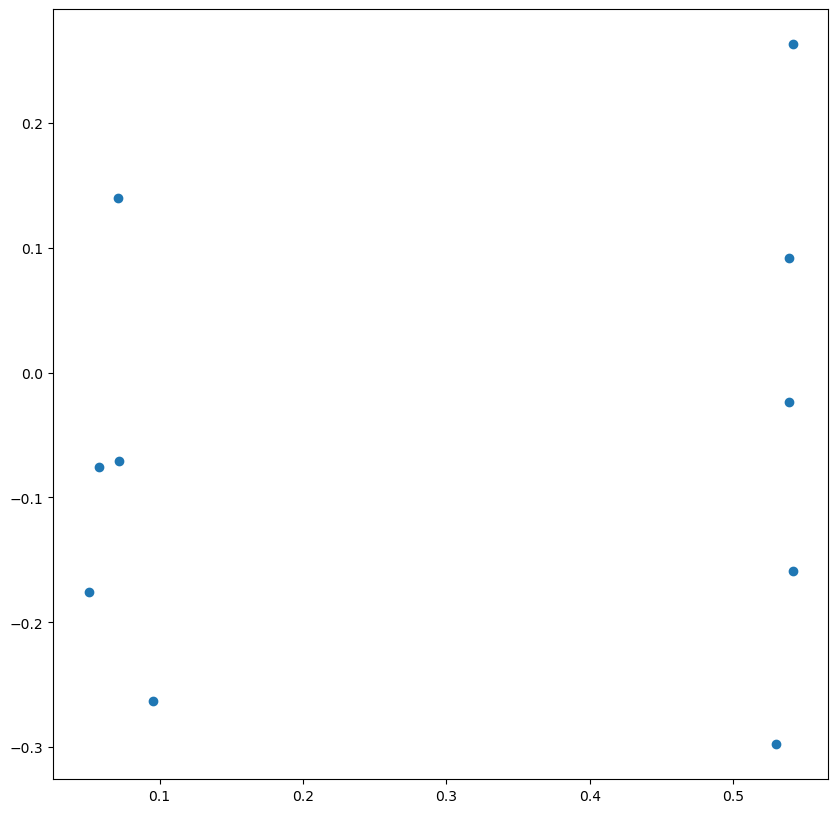

In [118]:
methods = ["normal"]
metric = "EnergyScore"
fig, axs = plt.subplots(1,1,figsize = (10,10))
for method in methods:
    subset = full_results[full_results["method"] == method]
    plt.scatter(subset["t"], subset[metric])